In [43]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

%matplotlib inline

In [109]:
bathydata = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
bathy = bathydata['Bathymetry']
meshdata = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
gdept_1d = meshdata['gdept_1d']
e3t_1d = meshdata['e3t_1d']

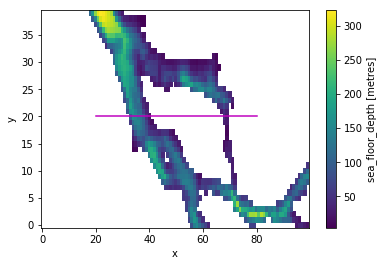

In [10]:
bathy[850:890, 30:130].plot()
plt.plot([50-30, 110-30], [870-850, 870-850], 'm-')

So along 870, from 50 to 110

In [29]:
iii = 870
jmin = 50
jmax = 110

121.86651840226745


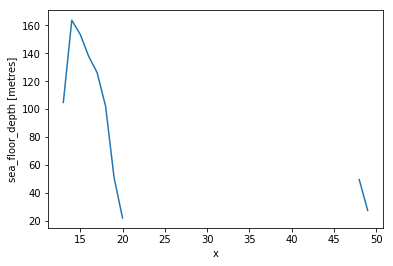

In [41]:
bathy[iii, jmin:jmax].plot()
print (gdept_1d.values[0, 27])

In [79]:
kmax = 31

201812 2016 results are split across results/results2  
so use 201806 results in nowcast-green
NOPE no e3t so 2017 in results2

In [106]:
flux = np.zeros((kmax, jmax-jmin))

for directory in glob.glob('/results2/SalishSea/hindcast.201812_annex/?????17'):
    vfile = directory + '/SalishSea_1h_*_grid_V.nc'
    efile = directory + '/SalishSea_1h_*_carp_T.nc'
    vel = glob.glob(vfile)[0]
    eee = glob.glob(efile)[0]
    print (vfile)
    with xr.open_dataset(vel)['vomecrty'] as vdata:
        with xr.open_dataset(eee)['e3t'] as edata:
            vvel = np.array(vdata[:, :kmax, iii, jmin:jmax])
            e3t = np.array(edata[:, :kmax, iii, jmin:jmax])
            e3tu = np.array(edata[:, :kmax, iii+1, jmin:jmax])
            for jj in range(jmax-jmin):
                for kk in range(kmax):
                    for tt in range(24):
                        e3v = min(e3t[tt, kk, jj], e3tu[tt, kk, jj])
                        flux[kk, jj] = flux[kk, jj] + (vvel[tt, kk, jj]*e3v)

/results2/SalishSea/hindcast.201812_annex/03sep17/SalishSea_1h_*_grid_V.nc
/results2/SalishSea/hindcast.201812_annex/16mar17/SalishSea_1h_*_grid_V.nc
/results2/SalishSea/hindcast.201812_annex/11apr17/SalishSea_1h_*_grid_V.nc
/results2/SalishSea/hindcast.201812_annex/10feb17/SalishSea_1h_*_grid_V.nc
/results2/SalishSea/hindcast.201812_annex/01aug17/SalishSea_1h_*_grid_V.nc
/results2/SalishSea/hindcast.201812_annex/05feb17/SalishSea_1h_*_grid_V.nc
/results2/SalishSea/hindcast.201812_annex/01jul17/SalishSea_1h_*_grid_V.nc
/results2/SalishSea/hindcast.201812_annex/24aug17/SalishSea_1h_*_grid_V.nc
/results2/SalishSea/hindcast.201812_annex/04nov17/SalishSea_1h_*_grid_V.nc
/results2/SalishSea/hindcast.201812_annex/09dec17/SalishSea_1h_*_grid_V.nc
/results2/SalishSea/hindcast.201812_annex/14feb17/SalishSea_1h_*_grid_V.nc
/results2/SalishSea/hindcast.201812_annex/26mar17/SalishSea_1h_*_grid_V.nc
/results2/SalishSea/hindcast.201812_annex/02jun17/SalishSea_1h_*_grid_V.nc
/results2/SalishSea/hindc

In [92]:
print (flux.shape, kmax)

(31, 60) 31


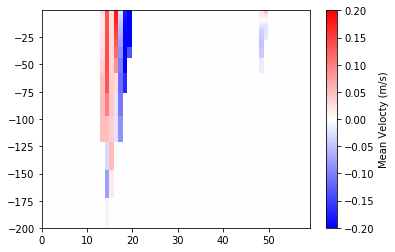

In [117]:
flux_forplot = np.empty_like(flux)
for j in range(jmax-jmin):
    flux_forplot[:kmax, j] = flux[:kmax, j]/(24*365)/e3t_1d[0, :kmax]
plt.pcolormesh(np.arange(60), -gdept_1d[0,:kmax], flux_forplot, cmap='bwr', vmax=0.2, vmin=-0.2 )
cb = plt.colorbar()
cb.set_label('Mean Velocty (m/s)')

In [108]:
print (flux[:, 1:].sum()/24/365*440)

-3270.0913376905514


3500 m3/s south